In [30]:
import librosa as lr

audio_file='./audio1.wav'
x,sr=lr.load(audio_file)
print(sr)


22050


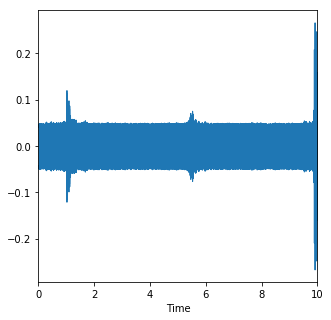

In [31]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(5,5))
lr.display.waveplot(x,sr=sr)

0


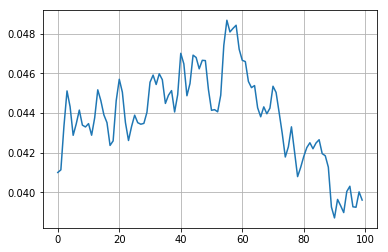

In [37]:
n0=500
n1=600
plt.plot(x[n0:n1])
plt.grid()
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

In [39]:
spectral_centroid=lr.feature.spectral_centroid(x,sr)[0]
spectral_centroid.shape


(431,)

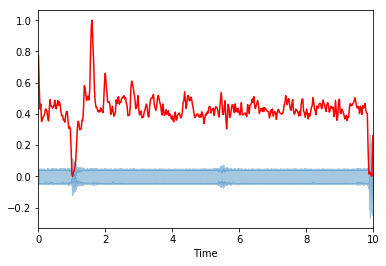

In [44]:
import sklearn
frames = range(len(spectral_centroid))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroid), color='r')

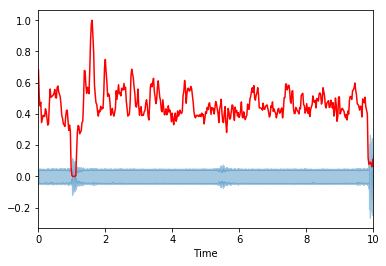

In [47]:
spectral_rolloff = lr.feature.spectral_rolloff(x, sr=sr)[0]
lr.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

In [67]:
ms=lr.feature.melspectrogram(x,sr)
print(ms)

[[7.93016192e+00 8.07673568e+00 8.04775246e+00 ... 2.20003727e+01
  1.84071585e+01 4.56915451e+00]
 [1.13763966e-02 9.52115599e-03 5.09694245e-03 ... 1.55192525e+01
  8.64625955e+00 6.75089143e+00]
 [2.43306140e-03 1.75098427e-03 7.00180222e-04 ... 8.37322295e+01
  5.75041340e+01 2.46213679e+01]
 ...
 [1.37591662e-05 3.43977990e-06 6.70982954e-15 ... 5.95201678e-14
  2.39335492e-07 2.86883686e-05]
 [1.34537008e-05 3.36341378e-06 6.80055137e-15 ... 3.01459724e-14
  2.32196396e-07 2.78325762e-05]
 [1.32615132e-05 3.31536712e-06 5.93336735e-15 ... 2.01154079e-14
  2.27807717e-07 2.73065273e-05]]


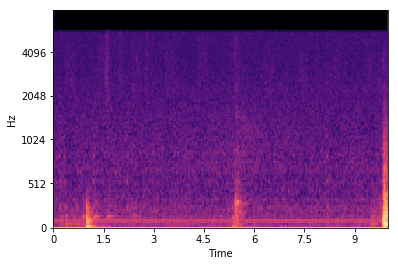

In [64]:
librosa.display.specshow(librosa.power_to_db(ms,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')

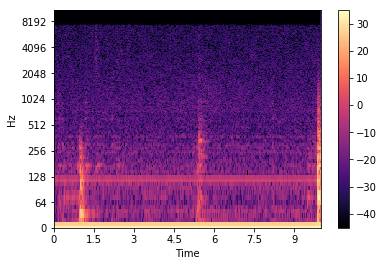

In [65]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log') 
plt.colorbar()

[[-4.27502057e+02 -4.30031893e+02 -4.35422583e+02 ... -2.96528761e+02
  -3.07154679e+02 -3.03957454e+02]
 [ 5.92714516e+01  7.64917514e+01  8.05834146e+01 ...  2.09355988e+02
   2.04049886e+02  1.64641964e+02]
 [ 1.47074044e+01  4.19742782e+00 -9.45105066e+00 ...  2.66002942e+01
   2.85309280e+01  5.36581523e+01]
 ...
 [ 5.65466454e+00  3.67121156e+00  2.36534850e+00 ...  4.10070690e+00
   3.14593127e+00 -2.04530653e+00]
 [ 4.13162325e-02  1.64421798e+00  6.51658197e+00 ...  7.33622357e+00
   6.41707907e+00  9.40863989e-01]
 [-5.53164927e-03  9.95507485e-01  1.75313926e+00 ...  4.10620095e+00
   4.45695923e+00 -6.71006114e-02]]


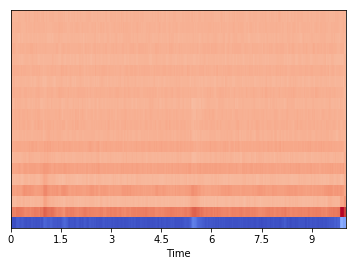

In [74]:
mfccs=lr.feature.mfcc(x,sr)
print(mfccs)
lr.display.specshow(mfccs,x_axis='time')